## Week 12 Assignment - W200 Python Fundamentals for Data Science, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. Please upload this **Notebook** with your solutions to your GitHub repository in your SUBMISSIONS/week_12 folder by 11:59PM PST the night before class.

This homework assignment is Week 12 which corresponds to the Unit #11 async. If you turn-in anything on ISVC please do so under the Week 12 Assignment category. (Apologies for the confusion)

## Objectives

- Explore and get insights from a real dataset using pandas
- Practice the use of pandas for: exploratory analysis, information gathering and discovery
- Use matplotlib for plotting charts from the data

## Data files

In this assignment you will apply what you are learning to answer questions about campaign contributions in the Democratic presidential primary race. We will use the csv file located here: https://drive.google.com/file/d/1Lgg-PwXQ6TQLDowd6XyBxZw5g1NGWPjB/view?usp=sharing. You will need to download and save the csv in the same folder as this notebook. This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

** REMEMBER -- DO NOT PUT THIS DATA IN YOUR GITHUB REPO ! **

Documentation for this data file can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## General Guidelines:

- This is a **real** dataset and so it contains errors and other pecularities to work through
- The data is ~218mb which will take some time to load (and probably won't load in google sheets or Excel)
- If you make assumptions please annotate them in your answer
- While we've left one code/markdown cell for you after each question as a placeholder, some of your answers will require multiple cells to fully respond
- Double click the markdown cells where it says YOUR ANSWER HERE to enter your written answers; if you need more cells for your written answers, please make them markdown cells (rather than code cells)

## Setup

First, run the two cells below. 

The first cell will load in the data to a pandas dataframe named 'contrib'. Note we define a custom date parser to speed up import (we could have Python guess the date format, but this can make the load a lot slower).  

The second cell subsets the data to look at the primary period.  Otherwise, we would see general election donations which would make it harder to draw conclusions about the primaries.  We will analyze through May 2016.

In [2]:
# import the data
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Create date parser to pass to read_csv
import datetime
d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')

contrib = pd.read_csv('P00000001-CA.csv', index_col=False, parse_dates = ['contb_receipt_dt'], date_parser=d)

# Note - for now, it is okay to ignore the warning about mixed types.  

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Subset data to primary period 
print(contrib.shape)

contrib = contrib.copy()[contrib['contb_receipt_dt'] <= datetime.datetime(2016, 5, 31)]
print(contrib.shape)

(1125659, 18)
(654502, 18)


## 1. Data Exploration

**1a.** First, let's take a preliminary look at our data:
- Print the *shape* of the data. What does this tell you about the number of variables and rows you have?
- Print a list of column names. 
- Review the documentation for this dataset (linked above). Do you have all of the columns you expect to have?
- Sometimes variable names are not clear unless we read the documentation. In your own words, based on the documentation, what information does the "election_tp" variable contain?

In [4]:
# YOUR CODE HERE
print(contrib.shape)
print(contrib.columns)

(654502, 18)
Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp'],
      dtype='object')


- 1a YOUR ANSWER HERE

1) we have a toal of 654,502 data records and 18 variables.

2) The column names are 'cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city','contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd','memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp'

3) Yes, the data has all of the columns we expect to have. 

4) "election_tp" means election types, which include primary election, such as presidential election, general election, such as state-wide election, etc.


**1b.** Print out the first 5 rows from the dataset to manually look through some of your data.

In [5]:
# YOUR CODE HERE
print(contrib.head())

     cmte_id    cand_id                  cand_nm          contbr_nm  \
0  C00575795  P00003392  Clinton, Hillary Rodham         AULL, ANNE   
1  C00575795  P00003392  Clinton, Hillary Rodham  CARROLL, MARYJEAN   
2  C00575795  P00003392  Clinton, Hillary Rodham   GANDARA, DESIREE   
3  C00577130  P60007168         Sanders, Bernard          LEE, ALAN   
4  C00577130  P60007168         Sanders, Bernard   LEONELLI, ODETTE   

     contbr_city contbr_st     contbr_zip            contbr_employer  \
0       LARKSPUR        CA 949,391,913.00                        NaN   
1        CAMBRIA        CA 934,284,638.00                        NaN   
2        FONTANA        CA 923,371,507.00                        NaN   
3      CAMARILLO        CA 930,111,214.00  AT&T GOVERNMENT SOLUTIONS   
4  REDONDO BEACH        CA 902,784,310.00   VERICOR ENTERPRISES INC.   

   contbr_occupation  contb_receipt_amt contb_receipt_dt receipt_desc memo_cd  \
0            RETIRED              50.00       2016-04-26   

**1c.** When working with a new dataset, it is important to explore and sanity check your variables. Pick **three** variables from the dataset above and run some quick sanity checks. For example, you may want to examine the maximum and minimum values, a frequency count, or something else. Use markdown cells to explain if your sanity checks "pass" your scrutiny or if you have concerns about the integrity of your data. 

In [6]:
# YOUR CODE HERE
#examine dates:
print(contrib.contb_receipt_dt.max())
print(contrib.contb_receipt_dt.min())

#examine election_tp:
print(contrib.election_tp.unique())
print(contrib[contrib['election_tp']=='P2020'])

#examine election receipt amount
print(contrib.contb_receipt_amt.max())
print(contrib.contb_receipt_amt.min())

2016-05-31 00:00:00
2013-11-05 00:00:00
['P2016' 'G2016' nan 'P2020']
          cmte_id    cand_id             cand_nm               contbr_nm  \
588680  C00578757  P60007697  Graham, Lindsey O.            SCHWARZ, DON   
588683  C00578757  P60007697  Graham, Lindsey O.            SCHWARZ, DON   
589007  C00578757  P60007697  Graham, Lindsey O.             TIROSH, GAL   
589238  C00578757  P60007697  Graham, Lindsey O.  SHULTZ, GEORGE P. HON.   
589241  C00578757  P60007697  Graham, Lindsey O.           SIMMS, JOSHUA   
589245  C00578757  P60007697  Graham, Lindsey O.          CATZ, SAFRA A.   
589537  C00578757  P60007697  Graham, Lindsey O.   FRANK, RICHARD H. MR.   

          contbr_city contbr_st     contbr_zip         contbr_employer  \
588680   SHERMAN OAKS        CA 914,234,831.00   RBC WEALTH MANAGEMENT   
588683   SHERMAN OAKS        CA 914,234,831.00   RBC WEALTH MANAGEMENT   
589007      LOS ALTOS        CA 940,231,644.00                 RETIRED   
589238       STANFORD    

- 1c YOUR ANSWER HERE

1) first we can examine the date. The date range for this data set is from 2013 to 2016, which looks reasonable.

2) second we can examine the election type. There are only four types of election in this data set. Looks like data before 2016 does not have such election type labels. But there are 7 records which happended in 2016 and labeled incorrectly as P2020, instead of P2016.

3) third, we can examine the maximum and minimal of contribution amount.maximun is 10,800, which is reasonable. However, the minimal is -10,000, which does not make sense. We should exclude those records.

## 2. Exploring Campaign Contributions

Let's investigate the donations to the candidates.

**2a.** 
Create a table that shows the total number of donations to each candidate. Hint: use "groupby" as shown in async unit 11.07.

When presenting data in a table, it is best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to get insights out of your tables. Use "sort_values" to sort the data so that candidates with the largest number of donations appear on top. From now on, all tables you present in this assignment (and course) should be sorted.

What candidate recieved the largest number of contributions (variable 'contb_receipt_amt')?

In [38]:
# YOUR CODE HERE
cand_don_count = contrib.groupby('cand_nm').contb_receipt_amt.count().sort_values(ascending = False)
print(cand_don_count)

cand_nm
Sanders, Bernard             371795
Clinton, Hillary Rodham      163509
Cruz, Rafael Edward 'Ted'     57136
Carson, Benjamin S.           27342
Rubio, Marco                  14089
Fiorina, Carly                 4696
Paul, Rand                     4256
Bush, Jeb                      3114
Kasich, John R.                2988
Trump, Donald J.               2255
Walker, Scott                   713
Huckabee, Mike                  531
O'Malley, Martin Joseph         397
Lessig, Lawrence                372
Graham, Lindsey O.              342
Christie, Christopher J.        333
Stein, Jill                     197
Perry, James R. (Rick)          116
Webb, James Henry Jr.           106
Santorum, Richard J.             84
Johnson, Gary                    77
Jindal, Bobby                    31
Pataki, George E.                20
Gilmore, James S III              3
Name: contb_receipt_amt, dtype: int64


- 2a YOUR ANSWER HERE

Sanders, Bernard is the candidate received the largest number of contributions.

**2b.** Now, create a table that shows the total **value** of donations to each candidate. What candidate raised the most money in California?

In [39]:
# YOUR CODE HERE
cand_don_sum = contrib.groupby('cand_nm').contb_receipt_amt.sum().sort_values(ascending = False)
print(cand_don_sum)

cand_nm
Clinton, Hillary Rodham     39,368,777.01
Sanders, Bernard            18,773,871.31
Cruz, Rafael Edward 'Ted'    6,286,460.34
Rubio, Marco                 4,846,483.72
Bush, Jeb                    3,325,536.83
Carson, Benjamin S.          2,952,109.00
Kasich, John R.              1,553,823.54
Fiorina, Carly               1,468,489.42
Trump, Donald J.               893,356.89
Paul, Rand                     797,624.29
Walker, Scott                  495,006.90
Christie, Christopher J.       456,066.00
Graham, Lindsey O.             408,595.00
O'Malley, Martin Joseph        297,834.26
Huckabee, Mike                 230,890.60
Perry, James R. (Rick)         208,400.00
Lessig, Lawrence               186,144.50
Webb, James Henry Jr.           76,568.16
Johnson, Gary                   41,187.60
Santorum, Richard J.            36,304.88
Pataki, George E.               30,450.00
Stein, Jill                     27,918.00
Jindal, Bobby                   23,231.26
Gilmore, James S III      

- 2b YOUR ANSWER HERE

Clinton, Hillary Rodham is the candidate raised the most money in California.

**2c.** Combining your tables
- What is the "type" of the two tables you printed above? Show if they are Series, or DataFrames.
- Convert any Series to pandas DataFrames.
- Update the variable (column) names to accurately describe what is shown
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table. Use the "join" function.

In [47]:
# YOUR CODE HERE
print(type(cand_don_count))
print(type(cand_don_count))

df_count = cand_don_count.to_frame()
df_count.columns = ['Total Number of Donations']

df_sum = cand_don_sum.to_frame()
df_sum.columns = ['Total Value of Donations']


combined = df_count.join(df_sum, how='outer')

print(combined)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
                           Total Number of Donations  Total Value of Donations
cand_nm                                                                       
Bush, Jeb                                       3114              3,325,536.83
Carson, Benjamin S.                            27342              2,952,109.00
Christie, Christopher J.                         333                456,066.00
Clinton, Hillary Rodham                       163509             39,368,777.01
Cruz, Rafael Edward 'Ted'                      57136              6,286,460.34
Fiorina, Carly                                  4696              1,468,489.42
Gilmore, James S III                               3                  8,100.00
Graham, Lindsey O.                               342                408,595.00
Huckabee, Mike                                   531                230,890.60
Jindal, Bobby                                     31       

**2d.** Calculate and add a new variable to your table from **2c** that shows the average $ per donation.

In [50]:
# YOUR CODE HERE
combined['Average Amount Per Donation'] = combined['Total Value of Donations'] / combined['Total Number of Donations']
combined.sort_values(by = 'Average Amount Per Donation', ascending = False)

,Total Number of Donations,Total Value of Donations,Average Amount Per Donation
cand_nm,,,
"Gilmore, James S III",3,"8,100.00","2,700.00"
"Perry, James R. (Rick)",116,"208,400.00","1,796.55"
"Pataki, George E.",20,"30,450.00","1,522.50"
"Christie, Christopher J.",333,"456,066.00","1,369.57"
"Graham, Lindsey O.",342,"408,595.00","1,194.72"
"Bush, Jeb",3114,"3,325,536.83","1,067.93"
"O'Malley, Martin Joseph",397,"297,834.26",750.21
"Jindal, Bobby",31,"23,231.26",749.40
"Webb, James Henry Jr.",106,"76,568.16",722.34


**2e.** There are several interesting conclusions you can draw from the table you have created. Please comment on the results of your data analysis in a short paragraph. What have you learned about campaign contributions in California?

- 2e YOUR ANSWER HERE

Sanders has the highest donation counts but lower total amount and even lower average donation amount, indicating most of his supporters may be low-income families.

Hilary raised the most money but lower on average amount per donation. Maybe most of her supporters are middle-class families.

Gilmore supporters are willing to donate more but only 3 supporters.

## 3. Exploring Donor Occupation

Above in part 2, we saw that some simple data analysis can give us insights into the campaign of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the "contbr_occupation" variable.

**3a.** Subset your data to create a data frame with only donations for Hillary Clinton. Then use value_counts() and head() to display the top 5 occupations (contbr_occupation) for her donors. Note: we are just interested in the count of donations, not the value of those donations.

In [59]:
# YOUR CODE HERE
clinton = contrib[contrib.cand_nm == 'Clinton, Hillary Rodham']
clinton_occupation = clinton.groupby('contbr_occupation').cmte_id.count().sort_values(ascending = False)
clinton_occupation.head()

contbr_occupation
RETIRED                  33450
ATTORNEY                  7315
INFORMATION REQUESTED     4742
TEACHER                   3591
HOMEMAKER                 3436
Name: cmte_id, dtype: int64

**3b.** Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.  Specifically, write a function called get_donors() that takes a DataFrame as input, and outputs a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [84]:
def get_donors(df_sub):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    df_sub_occupation = df_sub.groupby('contbr_occupation').cmte_id.count().sort_values(ascending = False)
    result = df_sub_occupation.head()
    
    print(result)
    print('==============================')
    
    # YOUR CODE HERE

**3c.** Now try running your function on subsets of the dataframe corresponding to three candidates:
    1. Hillary Clinton
    2. Bernie Sanders
    3. Donald Trump

In [86]:
# YOUR CODE HERE
clinton = contrib[contrib.cand_nm == 'Clinton, Hillary Rodham']
sanders = contrib[contrib.cand_nm == 'Sanders, Bernard']
trump = contrib[contrib.cand_nm == 'Trump, Donald J.']

get_donors(clinton)

get_donors(sanders)

get_donors(trump)

contbr_occupation
RETIRED                  33450
ATTORNEY                  7315
INFORMATION REQUESTED     4742
TEACHER                   3591
HOMEMAKER                 3436
Name: cmte_id, dtype: int64
contbr_occupation
NOT EMPLOYED         96371
RETIRED              15048
TEACHER              10167
SOFTWARE ENGINEER     7861
ENGINEER              7094
Name: cmte_id, dtype: int64
contbr_occupation
RETIRED                  849
INFORMATION REQUESTED     70
CEO                       57
OWNER                     51
PRESIDENT                 35
Name: cmte_id, dtype: int64


**3d.** Finally, use a groupby to divide the entire dataset by candidate.  Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.  Look at your output and marvel at what Pandas can do in just one line!

In [88]:
# YOUR CODE HERE
contrib.groupby('cand_nm').apply(get_donors)    


contbr_occupation
RETIRED      996
HOMEMAKER    180
ATTORNEY      92
Q.A.          89
PRESIDENT     84
Name: cmte_id, dtype: int64
contbr_occupation
RETIRED      996
HOMEMAKER    180
ATTORNEY      92
Q.A.          89
PRESIDENT     84
Name: cmte_id, dtype: int64
contbr_occupation
RETIRED                                   13692
INFORMATION REQUESTED PER BEST EFFORTS     1614
HOMEMAKER                                  1049
PHYSICIAN                                   329
R.N.                                        234
Name: cmte_id, dtype: int64
contbr_occupation
RETIRED       38
NONE          22
CONSULTANT    18
CEO           16
HOMEMAKER     15
Name: cmte_id, dtype: int64
contbr_occupation
RETIRED                  33450
ATTORNEY                  7315
INFORMATION REQUESTED     4742
TEACHER                   3591
HOMEMAKER                 3436
Name: cmte_id, dtype: int64
contbr_occupation
RETIRED                                   22956
INFORMATION REQUESTED PER BEST EFFORTS     1651
HOMEMA

""


**3e.** Comment on your findings in a short paragraph.

Most of the contributions come from retired people. The numbers of contributions vary significantly among candidates. Many records do not have complete occupation information. 

- 3e YOUR ANSWER HERE

**3f.** Think about your findings in section 3 vs. your findings in section 2 of this assignment. Do you have any new insights into the results you got in section 2, now that you see the top occupations for each candidate?

- 3f YOUR ANSWER HERE

Looks like most Republican supporters are high-income individuals. Most of the occupations are presidents/CEOs, making the average donation amount much higher than democrats. 


## 4. Plotting Data

There is an important element that we have not yet explored in this dataset - time.

**4a.** Please create a single line chart with the following elements:
- Show the date on the x-axis
- Show the contribution amount on the y-axis
- Include a title
- Include axis labels

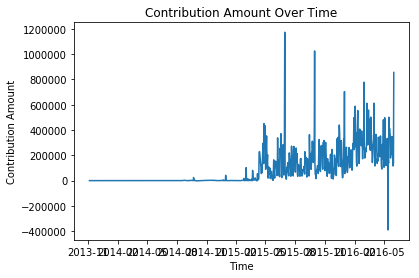

In [83]:
# YOUR CODE HERE
time_sub = contrib.groupby('contb_receipt_dt').contb_receipt_amt.sum().sort_index(ascending = True)
y = time_sub.values
x = time_sub.index
plt.xlabel('Time')
plt.title('Contribution Amount Over Time')
plt.ylabel('Contribution Amount')
plt.plot(x,y)

**4b.** This chart is messy (and you should make better plots for your project). While there are better ways we can show this data, what conclusions can you draw from just your basic plot?

- 4b YOUR ANSWER HERE

Before 2015, there are not much contributions. After 2015, contributions start to accumulate but fluctuate a lot. Certain dates the contribution may increase a lot, maybe because of an effective political campaign.

**4c.** Brainstorm: If you were going to improve on this plot looking at donations over time, what could you display that would be more useful? You do not need to do any plotting for this question.

- 4c YOUR ANSWER HERE

I would exclude data before 2015, extend x-axis, and exclude amounts less then zero.

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k